# Exercise 2 - Sextortion Analysis

In this demo we will investigate Bitcoin addresses that received money from Sextortion spam victims and are therefore, most likely, controlled by the perpetrator or some in-between money laundry network. 

The data from this demo is taken from our study [Spams meet Cryptocurrencies: Sextortion in the Bitcoin Ecosystem](https://arxiv.org/abs/1908.01051) and is a subset of [all the 12,533 Bitcoin addresses](https://github.com/MatteoRomiti/Sextortion_Spam_Bitcoin) we have collected from 4,340,736 sextortion spam emails.

The data for this demo is available in `./data/sextortion_addresses.csv`

We are going to answer the following questions:

* Q1: How many USD did the input addresses receive in total?

* Q2: To how many entities can we map these addresses?

* Q3: How many addresses are controlled by these entities?

* Q4: How many USD did the corresponding entities receive in total?

* Q5: Where did the money come from, and where did it go to?

## Preparations

First, we install the graphsense-python package as described in the [README](https://github.com/graphsense/graphsense-python/blob/develop/README.md) of this repository. Import the package and configure the API endpoint. An API key for the [GraphSense](https://graphsense.github.io/) instance hosted by [Iknaio](https://www.ikna.io/) can be requested by sending an email to [contact@iknaio.com](contact@iknaio.com).

In [1]:
import graphsense
from graphsense.api import bulk_api, general_api

import json
import pandas as pd

from pprint import pprint

In [2]:
f = open('config.json')
config = json.load(f)
f.close()

In [3]:
configuration = graphsense.Configuration(
    host = config['graphsense']['host'],
    api_key = {'api_key': config['graphsense']['api_key']})

GraphSense supports Bitcoin-like UTXO and Ethereum-like Account-Model ledgers. Iknaio currently hosts BTC, LTC, BCH, ZEC, and ETH.

We are investigating Bitcoin transactions, therefore we set the default currency to Bitcoin **BTC**.

In [4]:
CURRENCY = 'btc'

We can test whether or client works, by checking what data the GraphSense endpoint provides

In [5]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = general_api.GeneralApi(api_client)
    api_response = api_instance.get_statistics()
    pprint(api_response)

{'currencies': [{'name': 'btc',
                 'no_address_relations': 6758109756,
                 'no_addresses': 1045200508,
                 'no_blocks': 762641,
                 'no_entities': 469256656,
                 'no_labels': 3303,
                 'no_tagged_addresses': 250851468,
                 'no_txs': 777477873,
                 'timestamp': 1668122552},
                {'name': 'bch',
                 'no_address_relations': 2303432268,
                 'no_addresses': 333745971,
                 'no_blocks': 766073,
                 'no_entities': 150751693,
                 'no_labels': 86,
                 'no_tagged_addresses': 13674144,
                 'no_txs': 363817727,
                 'timestamp': 1668123907},
                {'name': 'ltc',
                 'no_address_relations': 1382523914,
                 'no_addresses': 160527773,
                 'no_blocks': 2366891,
                 'no_entities': 67746829,
                 'no_labels': 66,
  

Now we load the provided sample Bitcoin addresses


In [6]:
addressDF = pd.read_csv('./data/sextortion_addresses.csv')
addressDF.columns = ['address']
addressDF

,address
0,1EZS92K4xJbymDLwG4F7PNF5idPE62e9XY
1,16B4HuSAJ4WRdCq7dzA5b4ASh6QQ7ytZWB
2,1EdX5vtBiHGmkqbJc7VRSuVMx9Kpgh53Tp
3,3Ch7RPfwkJ3wHhiBfA4CNc8SagGdjbZwVs
4,19GqTJDhu7A1qg7rnK3KS7tmCkCTMTz6xD
...,...
239,1BC1pvPUQF9QHg73ha4AEAhaoEvg6HmTbS
240,13QKq8RsvbJnLRbi5ZcVX1ziYW83tqvp1q
241,1DiEqE5R1Ktu7QCLUuJN31PNtpoBU41x2E
242,1NWybUp8ZJXKyDg2DR5MaePspforMPYbM3


# Q1. How many USD (US dollars) did the input addresses receive in total?

Instead of querying each address individually, we just pass the dataframe of known sextortion payment addresses.

In [7]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    operation = "get_address"
    body = {'address': addressDF['address'].to_list()}

    try:
        respAddrDF = pd.read_csv(
            api_instance.bulk_csv(CURRENCY, operation, body=body,
                                  num_pages=1, _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [8]:
respAddrDF

,_error,_info,_request_address,address,balance_eur,balance_usd,balance_value,currency,entity,first_tx_height,...,no_incoming_txs,no_outgoing_txs,out_degree,status,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value
0,NaN,NaN,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,1FG7huiM8Jq8JdpULfvVDCHThZqVeKB96q,0.0,0.0,0,btc,421412157,536677,...,3,3,5,clean,349.91,409.00,6249697,348.50,407.37,6249697
1,NaN,NaN,1EGMpZV7AnKKpNK9C1ziPMaQqNc9zVT4C,1EGMpZV7AnKKpNK9C1ziPMaQqNc9zVT4C,0.0,0.0,0,btc,449332788,549513,...,1,2,2,clean,797.06,904.34,14110000,463.44,528.55,14110000
2,NaN,NaN,1Lmk4eUXcmtVU6YQvaPJ4yihu4fEcKtkby,1Lmk4eUXcmtVU6YQvaPJ4yihu4fEcKtkby,0.0,0.0,0,btc,457139754,553043,...,2,1,1,clean,885.24,1006.62,28957951,843.88,959.57,28957951
3,NaN,NaN,13QKq8RsvbJnLRbi5ZcVX1ziYW83tqvp1q,13QKq8RsvbJnLRbi5ZcVX1ziYW83tqvp1q,0.0,0.0,0,btc,473061622,562602,...,1,1,1,clean,671.24,759.10,20806300,671.24,759.10,20806300
4,NaN,NaN,1ANnnhQY6CVyLNBu9AkWzpiZaLPwE678cU,1ANnnhQY6CVyLNBu9AkWzpiZaLPwE678cU,0.0,0.0,0,btc,466309837,561814,...,1,1,2,clean,599.22,682.75,20000000,645.23,729.69,20000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,NaN,NaN,1JcMavbj2ptD8xCMx8vqM7qLXPgMDGn58R,1JcMavbj2ptD8xCMx8vqM7qLXPgMDGn58R,0.0,0.0,0,btc,449332788,549697,...,2,1,1,clean,812.33,921.59,14375546,472.16,538.50,14375546
240,NaN,NaN,19D67Tgb3neJiTHd8pZDEBYmUn2qSjxEeB,19D67Tgb3neJiTHd8pZDEBYmUn2qSjxEeB,0.0,0.0,0,btc,430255405,545984,...,10,1,1,clean,3865.50,4472.08,68020119,3839.02,4412.57,68020119
241,NaN,NaN,1M3uh3QNTxVsK1MqR4cBdqajojUixCiwwq,1M3uh3QNTxVsK1MqR4cBdqajojUixCiwwq,0.0,0.0,0,btc,430255405,545105,...,2,1,2,clean,973.51,1119.54,17000000,973.51,1119.54,17000000
242,NaN,NaN,11wQFVQ65DdfzWXqup3JdY7prFazMbXjc,11wQFVQ65DdfzWXqup3JdY7prFazMbXjc,0.0,0.0,0,btc,466309837,562276,...,5,2,3,clean,3194.68,3616.88,98812530,3318.26,3754.99,98812530


In [9]:
print(f"{len(respAddrDF)} addresses received {sum(respAddrDF['total_received_usd']):.2f} USD")

244 addresses received 885297.51 USD


# Q2: To how many entities can we map these addresses?

In [10]:
print(f"They map to {len(respAddrDF['entity'].drop_duplicates())} distinct entities")

They map to 95 distinct entities


# Q3: How many addresses are controlled by these entities?

We now fetch summary statistics for each entity.

In [11]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    operation = "get_entity"
    body = {'entity': respAddrDF['entity'].drop_duplicates().to_list()}

    try:
        respEntityDF = pd.read_csv(
            api_instance.bulk_csv(CURRENCY, operation, body=body,
                                  num_pages=1, _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [12]:
respEntityDF

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,best_address_tag_abuse,best_address_tag_address,best_address_tag_category,best_address_tag_confidence,...,no_incoming_txs,no_outgoing_txs,out_degree,root_address,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value
0,NaN,NaN,445435576,0.00,0.0,0,sextortion,17aJNqdHX2GatX9fKGKUpkWBWEd9fpt7YF,NaN,forensic,...,1,1,2,17aJNqdHX2GatX9fKGKUpkWBWEd9fpt7YF,5.50,6.26,98765,5.50,6.26,98765
1,NaN,NaN,463565677,0.00,0.0,0,sextortion,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,NaN,forensic,...,3,2,2,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,909.67,1042.00,26111818,909.67,1041.99,26111818
2,NaN,NaN,422223799,0.00,0.0,0,sextortion,1EkAVVDg8Rbwwa7j9DbvHQ7VmQ4FkBdEGT,NaN,forensic,...,14,2,3,17iRfpgSwmJ6nLXR8evx6pUBo3R33S5LXB,5954.55,6983.81,106715714,6086.09,7124.81,106715714
3,NaN,NaN,435216677,0.00,0.0,0,sextortion,16e6KPCPGy5RNAmsBFKKChe91PcjgLDN6o,NaN,forensic,...,10,4,8,16e6KPCPGy5RNAmsBFKKChe91PcjgLDN6o,5958.79,6753.82,180288339,5960.50,6748.26,180288339
4,NaN,NaN,473061622,0.00,0.0,0,sextortion,1FVuyuSN41aa3JN9sn8qkuD2PmaMEMHHnc,NaN,forensic,...,104,7,7,1MrUDSrZiqD3ijxsBUPt2SukoFy534orP2,43306.39,49144.83,1300750194,44447.88,50393.00,1300750194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,445951743,0.00,0.0,0,sextortion,19ZfkZjtkU4DihmKE1yCyspqzanbGi8w58,NaN,forensic,...,1,1,1,19ZfkZjtkU4DihmKE1yCyspqzanbGi8w58,1512.09,1711.39,27089154,1529.82,1722.73,27089154
91,NaN,NaN,458388437,0.00,0.0,0,sextortion,14VbGhtysr6wrNs7EhdKiS2NoMmMDBM8cn,NaN,forensic,...,3,3,3,14VbGhtysr6wrNs7EhdKiS2NoMmMDBM8cn,1903.59,2166.41,63078336,1895.01,2151.46,63078336
92,NaN,NaN,459416857,0.00,0.0,0,sextortion,1MbdGY1LVr6gEjyN3Rok5HQDQcjWbYmLds,NaN,forensic,...,7,2,2,1MbdGY1LVr6gEjyN3Rok5HQDQcjWbYmLds,2218.14,2517.37,70867328,2334.25,2655.57,70867328
93,NaN,NaN,466309837,256.68,255.5,1452791,sextortion,1PjxMdF22GCcTKSTaky7ema3F5V4kjRxam,NaN,forensic,...,508,8,9,1G1qFoadiDxa7zTvppSMJhJi63tNUL3cy7,176338.70,201229.48,5511451448,176361.08,200977.56,5509998657


In [13]:
print(f"These {len(respEntityDF)} entities control {sum(respEntityDF['no_addresses'])} addresses")

These 95 entities control 2029054 addresses


Let's investigate these entities a bit deeper.

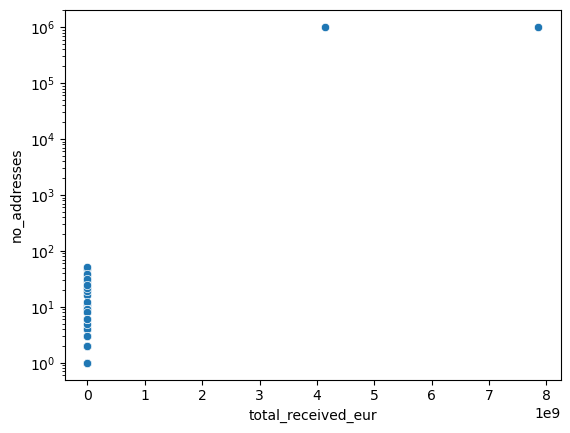

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.scatterplot(data=respEntityDF, x="total_received_eur", y="no_addresses")
p.set(yscale="log")
plt.show(p)

We can assume that entities that received large funds and control a very large number of addresses are services (e.g., exchanges) or super-clusters. Therefore, for our further analysis, we filter our entities by **ignoring entities with more than 10K address**.

In [15]:
respEntityDFfiltered = respEntityDF[respEntityDF['no_addresses'] < 10e3]
respEntityDFfiltered

,_error,_info,_request_entity,balance_eur,balance_usd,balance_value,best_address_tag_abuse,best_address_tag_address,best_address_tag_category,best_address_tag_confidence,...,no_incoming_txs,no_outgoing_txs,out_degree,root_address,total_received_eur,total_received_usd,total_received_value,total_spent_eur,total_spent_usd,total_spent_value
0,NaN,NaN,445435576,0.00,0.0,0,sextortion,17aJNqdHX2GatX9fKGKUpkWBWEd9fpt7YF,NaN,forensic,...,1,1,2,17aJNqdHX2GatX9fKGKUpkWBWEd9fpt7YF,5.50,6.26,98765,5.50,6.26,98765
1,NaN,NaN,463565677,0.00,0.0,0,sextortion,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,NaN,forensic,...,3,2,2,1e8o68StxCFLr6wdwKBrBqMQZc1VbFVMk,909.67,1042.00,26111818,909.67,1041.99,26111818
2,NaN,NaN,422223799,0.00,0.0,0,sextortion,1EkAVVDg8Rbwwa7j9DbvHQ7VmQ4FkBdEGT,NaN,forensic,...,14,2,3,17iRfpgSwmJ6nLXR8evx6pUBo3R33S5LXB,5954.55,6983.81,106715714,6086.09,7124.81,106715714
3,NaN,NaN,435216677,0.00,0.0,0,sextortion,16e6KPCPGy5RNAmsBFKKChe91PcjgLDN6o,NaN,forensic,...,10,4,8,16e6KPCPGy5RNAmsBFKKChe91PcjgLDN6o,5958.79,6753.82,180288339,5960.50,6748.26,180288339
4,NaN,NaN,473061622,0.00,0.0,0,sextortion,1FVuyuSN41aa3JN9sn8qkuD2PmaMEMHHnc,NaN,forensic,...,104,7,7,1MrUDSrZiqD3ijxsBUPt2SukoFy534orP2,43306.39,49144.83,1300750194,44447.88,50393.00,1300750194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NaN,NaN,445951743,0.00,0.0,0,sextortion,19ZfkZjtkU4DihmKE1yCyspqzanbGi8w58,NaN,forensic,...,1,1,1,19ZfkZjtkU4DihmKE1yCyspqzanbGi8w58,1512.09,1711.39,27089154,1529.82,1722.73,27089154
91,NaN,NaN,458388437,0.00,0.0,0,sextortion,14VbGhtysr6wrNs7EhdKiS2NoMmMDBM8cn,NaN,forensic,...,3,3,3,14VbGhtysr6wrNs7EhdKiS2NoMmMDBM8cn,1903.59,2166.41,63078336,1895.01,2151.46,63078336
92,NaN,NaN,459416857,0.00,0.0,0,sextortion,1MbdGY1LVr6gEjyN3Rok5HQDQcjWbYmLds,NaN,forensic,...,7,2,2,1MbdGY1LVr6gEjyN3Rok5HQDQcjWbYmLds,2218.14,2517.37,70867328,2334.25,2655.57,70867328
93,NaN,NaN,466309837,256.68,255.5,1452791,sextortion,1PjxMdF22GCcTKSTaky7ema3F5V4kjRxam,NaN,forensic,...,508,8,9,1G1qFoadiDxa7zTvppSMJhJi63tNUL3cy7,176338.70,201229.48,5511451448,176361.08,200977.56,5509998657


# Q4: How many USD did the corresponding entities receive in total?

In [16]:
print(f"{len(respEntityDFfiltered)} entities, which control {sum(respEntityDFfiltered['no_addresses'])} addresses, " +
      f"received {sum(respEntityDFfiltered['total_received_usd']):.2f} USD")

93 entities, which control 559 addresses, received 1510834.59 USD


# Q5: Where did the money come from, where did it go to?

For all filtered entities - we denote them as focus entities - we now gather all sending and receiving entities.

In [17]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    CURRENCY = "btc"
    operation = "list_entity_neighbors"
    body = {'entity': respEntityDFfiltered['_request_entity'].to_list(),
            'direction': 'in',
            'include_labels': True}

    try:
        sendingEntitiesDF = pd.read_csv(api_instance.bulk_csv(CURRENCY, operation, body=body,
                                        num_pages=2,
                                        _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [18]:
sendingEntitiesDF

,_error,_info,_request_entity,entity_balance_eur,entity_balance_usd,entity_balance_value,entity_best_address_tag_abuse,entity_best_address_tag_address,entity_best_address_tag_category,entity_best_address_tag_confidence,...,entity_total_received_value,entity_total_spent_eur,entity_total_spent_usd,entity_total_spent_value,labels,labels_count,no_txs,value_eur,value_usd,value_value
0,NaN,NaN,480505216,0.00,0.00,0,NaN,NaN,NaN,NaN,...,18903827,6.666500e+02,7.561200e+02,18903827,NaN,0,1,666.20,755.61,18891083
1,NaN,NaN,466952937,0.00,0.00,0,sextortion,1CnQxRTP5WeGmwaSriYdefDEHyjWpY7tjw,NaN,forensic,...,22836576,7.990800e+02,9.145600e+02,22836576,sextortion spam,1,1,534.05,611.75,15159987
2,NaN,NaN,463542338,0.00,0.00,0,NaN,NaN,NaN,NaN,...,1371063715,4.696999e+04,5.379943e+04,1371063715,NaN,0,1,482.10,552.20,14072579
3,NaN,NaN,467333820,2116920.87,2107182.98,11981636212,NaN,3MEa8XTY78bibHhVbM4JxJE77ij5ZGEBpj,exchange,manual_transaction,...,1177806601629286,1.632319e+11,1.883404e+11,1177794619993074,coinbase,1,1,807.16,931.06,25308000
4,NaN,NaN,445951743,961414.14,956991.61,5441542306,NaN,NaN,NaN,NaN,...,32822376153885,2.575171e+09,2.991771e+09,32816934611579,NaN,0,1,1512.09,1711.39,27089154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,NaN,NaN,434423451,0.00,0.00,0,NaN,NaN,NaN,NaN,...,824400,4.663000e+01,5.252000e+01,824400,NaN,0,1,44.12,49.70,780000
2629,NaN,NaN,434423451,0.00,0.00,0,NaN,NaN,NaN,NaN,...,1000000000,5.079984e+04,5.738350e+04,1000000000,NaN,0,1,166.21,187.75,3271900
2630,NaN,NaN,434423451,0.00,0.00,0,NaN,NaN,NaN,NaN,...,2899900,1.024400e+02,1.162900e+02,2899900,NaN,0,1,95.49,108.40,2703200
2631,NaN,NaN,434423451,0.00,0.00,0,NaN,NaN,NaN,NaN,...,899093532,3.175950e+04,3.605338e+04,899093532,NaN,0,1,164.52,186.76,4657500


Our foucus entities also transfer funds among themselves. We remove them because we are interested in (known) other parties.

In [19]:
sendingEntitiesDF_filtered = sendingEntitiesDF[~sendingEntitiesDF['entity_entity'] \
    .isin(sendingEntitiesDF['_request_entity'])] \
    .loc[:, ['_request_entity', 'entity_entity', 'entity_best_address_tag_label']] \
    .rename(columns={'_request_entity': 'src_entity',
                     'entity_entity': 'dst_entity',
                     'entity_best_address_tag_label':'label'}) \
    .dropna()
sendingEntitiesDF_filtered

,src_entity,dst_entity,label
3,467333820,4635850,coinbase
9,477682623,59774322,bitstamp.net
13,445210782,59774322,bitstamp.net
56,462065618,59774322,bitstamp.net
57,462065618,288813908,binance
...,...,...,...
2315,434423451,288813908,binance
2317,434423451,304006815,bitpanda
2318,434423451,319021677,kraken
2330,434423451,389215221,gate


In [20]:
print(f"Our focus entities received funds from {len(sendingEntitiesDF_filtered)} other known entities")

Our focus entities received funds from 159 other known entities


The above entities primarily represent custodial wallets hosted by major cryptoasset exchanges. They were most likely used to transfer by extortion victims to transfer funds to the perpetrators. Let's proceed and investigate the outgoing side.

In [21]:
with graphsense.ApiClient(configuration) as api_client:
    api_instance = bulk_api.BulkApi(api_client)

    CURRENCY = "btc"
    operation = "list_entity_neighbors"
    body = {'entity': respEntityDFfiltered['entity'].to_list(),
            'direction': 'out',
            'include_labels': True}

    try:
        receivingEntitiesDF = pd.read_csv(api_instance.bulk_csv(CURRENCY, operation, body=body,
                                        num_pages=2,
                                        _preload_content=False))
    except graphsense.ApiException as e:
        print("Exception when calling BulkApi->bulk_csv: %s\n" % e)

In [22]:
receivingEntitiesDF

,_error,_info,_request_entity,entity_balance_eur,entity_balance_usd,entity_balance_value,entity_best_address_tag_abuse,entity_best_address_tag_address,entity_best_address_tag_category,entity_best_address_tag_confidence,...,entity_total_received_value,entity_total_spent_eur,entity_total_spent_usd,entity_total_spent_value,labels,labels_count,no_txs,value_eur,value_usd,value_value
0,NaN,NaN,467256347,0.0,0.0,0,NaN,NaN,NaN,NaN,...,410254700,13084.49,15092.96,410254700,NaN,0,1,0.70,0.81,22100
1,NaN,NaN,468708086,0.0,0.0,0,NaN,NaN,NaN,NaN,...,105716916,3327.29,3780.47,105716916,NaN,0,1,3338.78,3806.88,105716916
2,NaN,NaN,445951743,0.0,0.0,0,NaN,NaN,NaN,NaN,...,27088581,1529.79,1722.70,27088581,NaN,0,1,1529.79,1722.70,27088581
3,NaN,NaN,435755627,0.0,0.0,0,NaN,NaN,NaN,NaN,...,616724735,44062.15,49204.21,616724735,NaN,0,1,14884.45,16628.91,202848728
4,NaN,NaN,446281042,0.0,0.0,0,NaN,NaN,NaN,NaN,...,915704906,32180.90,36617.78,915704906,NaN,0,1,718.03,811.74,14372033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,NaN,454862866,0.0,0.0,0,NaN,NaN,NaN,NaN,...,11630718,409.72,469.34,11630718,NaN,0,1,74.28,84.98,2108270
354,NaN,NaN,454862866,0.0,0.0,0,NaN,NaN,NaN,NaN,...,11074412,351.96,402.08,11074412,NaN,0,1,390.20,446.39,11074412
355,NaN,NaN,459266759,0.0,0.0,0,NaN,NaN,NaN,NaN,...,17161398,493.09,556.46,17161398,NaN,0,1,493.09,556.46,17161398
356,NaN,NaN,459266759,0.0,0.0,0,NaN,NaN,NaN,NaN,...,11823837,414.26,472.83,11823837,NaN,0,1,414.26,472.83,11823837


In [23]:
receivingEntitiesDF_filtered = receivingEntitiesDF[~receivingEntitiesDF['entity_entity'] \
    .isin(receivingEntitiesDF['_request_entity'])] \
    .drop_duplicates()
receivingEntitiesDF_filtered

,_error,_info,_request_entity,entity_balance_eur,entity_balance_usd,entity_balance_value,entity_best_address_tag_abuse,entity_best_address_tag_address,entity_best_address_tag_category,entity_best_address_tag_confidence,...,entity_total_received_value,entity_total_spent_eur,entity_total_spent_usd,entity_total_spent_value,labels,labels_count,no_txs,value_eur,value_usd,value_value
0,NaN,NaN,467256347,0.0,0.0,0,NaN,NaN,NaN,NaN,...,410254700,13084.49,15092.96,410254700,NaN,0,1,0.70,0.81,22100
1,NaN,NaN,468708086,0.0,0.0,0,NaN,NaN,NaN,NaN,...,105716916,3327.29,3780.47,105716916,NaN,0,1,3338.78,3806.88,105716916
2,NaN,NaN,445951743,0.0,0.0,0,NaN,NaN,NaN,NaN,...,27088581,1529.79,1722.70,27088581,NaN,0,1,1529.79,1722.70,27088581
3,NaN,NaN,435755627,0.0,0.0,0,NaN,NaN,NaN,NaN,...,616724735,44062.15,49204.21,616724735,NaN,0,1,14884.45,16628.91,202848728
4,NaN,NaN,446281042,0.0,0.0,0,NaN,NaN,NaN,NaN,...,915704906,32180.90,36617.78,915704906,NaN,0,1,718.03,811.74,14372033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,NaN,NaN,454862866,0.0,0.0,0,NaN,NaN,NaN,NaN,...,11630718,409.72,469.34,11630718,NaN,0,1,74.28,84.98,2108270
354,NaN,NaN,454862866,0.0,0.0,0,NaN,NaN,NaN,NaN,...,11074412,351.96,402.08,11074412,NaN,0,1,390.20,446.39,11074412
355,NaN,NaN,459266759,0.0,0.0,0,NaN,NaN,NaN,NaN,...,17161398,493.09,556.46,17161398,NaN,0,1,493.09,556.46,17161398
356,NaN,NaN,459266759,0.0,0.0,0,NaN,NaN,NaN,NaN,...,11823837,414.26,472.83,11823837,NaN,0,1,414.26,472.83,11823837


The entities listed above received funds from the perpetrator and are most likely part of a money laundering scheme.

In [24]:
known_receivingEntitiesDF = receivingEntitiesDF_filtered[['entity_entity', '_request_entity', 'entity_best_address_tag_label']] \
    .rename(columns={'_request_entity': 'dst_entity',
                     'entity_entity': 'src_entity',
                     'entity_best_address_tag_label':'label'}) \
    .dropna()

known_receivingEntitiesDF

,src_entity,dst_entity,label
72,424153801,478282212,coinpayments.net
93,274076081,420026147,binance
118,274076081,429118733,binance
177,366385635,455253353,okex
219,274076081,430623047,binance
248,274076081,440390219,binance


We find several direct connections between payment addresses controlled by the perpetrator and cryptoasset exchanges.

But we should continue this investigation over several hops, which is something we will do in a later exercise.

## Network Visualization

Finally, we build and visualize a network showing the entities we just identified and collected.

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

### Exchanges sending money to sextortion addresses

In [26]:
g = nx.DiGraph()
for i, row in sendingEntitiesDF_filtered.iterrows(): 
    g.add_edge(row['src_entity'], row['dst_entity'])
    g.add_node(row['src_entity'], label=row['label'])
    g.add_node(row['dst_entity'], label='sextortion')

In [27]:
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

Number of nodes: 70
Number of edges: 159


In [28]:
node_colours = []

for node_id, values in list(g.nodes(data=True)):
    if(values['label'] == 'sextortion'):
        node_colours.append('red')
    else:
        node_colours.append('lightgreen')

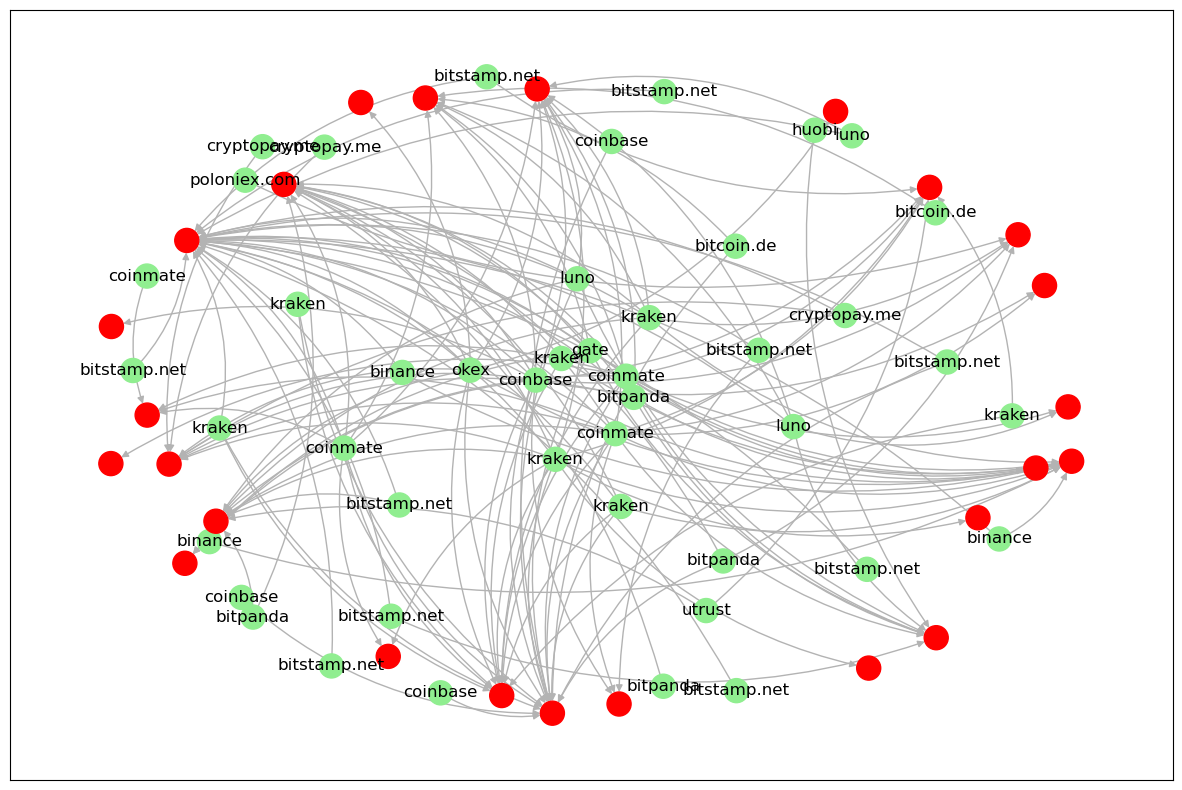

In [29]:
import math

pos = nx.spring_layout(g, k=10/math.sqrt(g.order()))

plt.figure(1, figsize=(15,10))

nx.draw_networkx_nodes(g, pos, node_color=node_colours)
node_labels = nx.get_node_attributes(g, 'label')
node_labels = {n:"" if lab == 'sextortion' else lab for n,lab in node_labels.items()} 


nx.draw_networkx_labels(g, pos, labels=node_labels)
nx.draw_networkx_edges(g, pos, connectionstyle="arc3,rad=0.2", edge_color=(0.7,0.7,0.7))
plt.show()


### Exchanges receiving money from sextortion addresses

In [30]:
g = nx.DiGraph()
for i, row in known_receivingEntitiesDF.iterrows():
    g.add_edge(row['src_entity'], row['dst_entity'])
    g.add_node(row['dst_entity'], label=row['label'])
    g.add_node(row['src_entity'], label='sextortion')

In [31]:
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")

Number of nodes: 9
Number of edges: 6


In [32]:
node_colours = []

for node_id, values in list(g.nodes(data=True)):
    if(values['label'] == 'sextortion'):
        node_colours.append('red')
    else:
        node_colours.append('lightgreen')

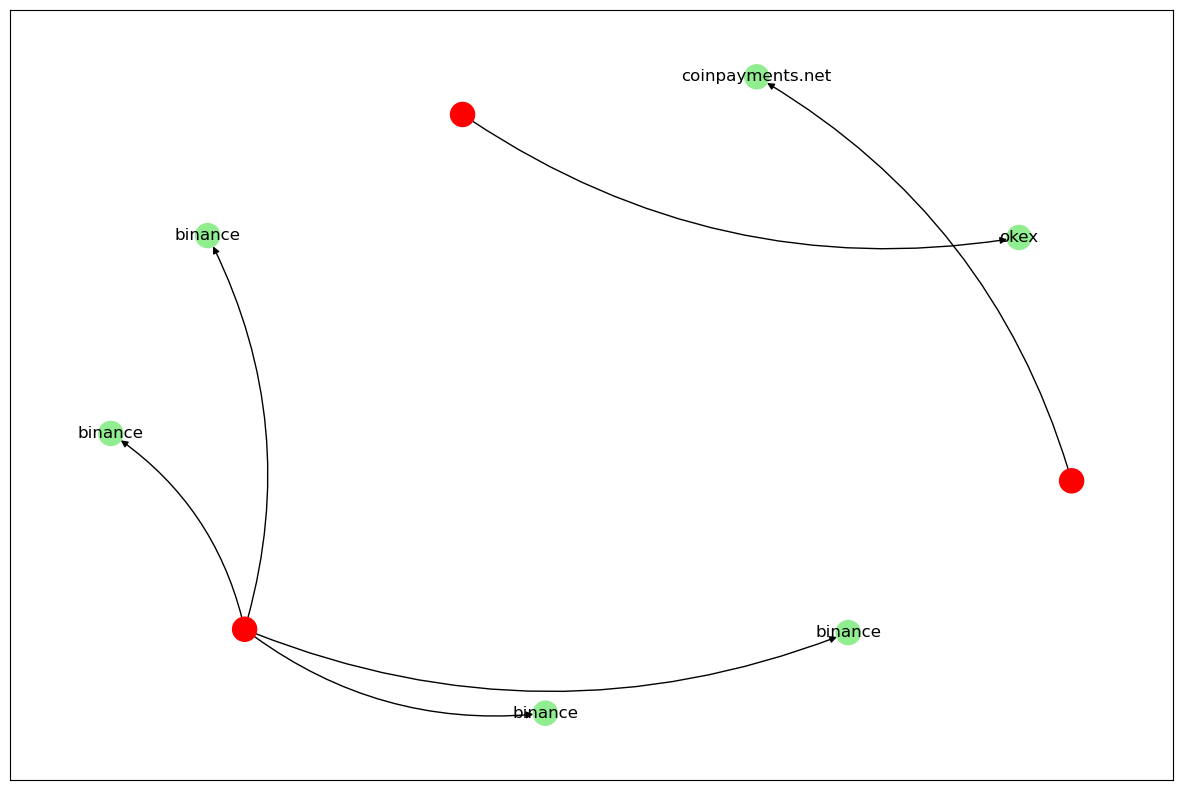

In [33]:
import math

pos = nx.spring_layout(g, k=10/math.sqrt(g.order()))

plt.figure(1, figsize=(15,10))

nx.draw_networkx_nodes(g, pos, node_color=node_colours)
node_labels = nx.get_node_attributes(g, 'label')
node_labels = {n:"" if lab == 'sextortion' else lab for n,lab in node_labels.items()} 
nx.draw_networkx_labels(g, pos, labels=node_labels)
nx.draw_networkx_edges(g, pos, connectionstyle="arc3,rad=0.2")
plt.show()